import numpy as np
from keras.datasets import fashion_mnist

In [52]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [53]:
X_train.shape

(60000, 28, 28)

In [54]:
y_train.shape

(60000,)

In [55]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [56]:
import matplotlib.pyplot as plt
%maplotlib
import vis

UsageError: Line magic function `%maplotlib` not found.


In [57]:
vis.fashion_mnist_label()

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

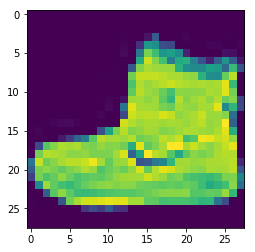

In [58]:
plt.imshow(X_train[0])

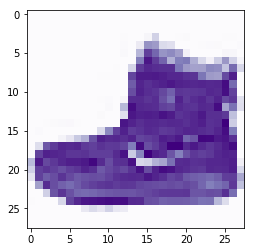

In [59]:
plt.imshow(X_train[0], cmap='Purples')

In [60]:
y_train[0]

9

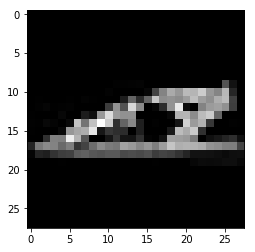

In [61]:
number=155
plt.imshow(X_train[number], cmap="gray")

In [62]:
y_train[155]

5

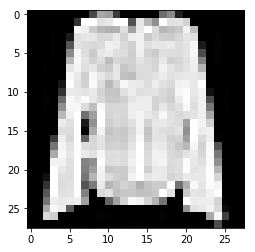

In [63]:
plt.imshow(X_train[301], cmap='gray')

In [64]:
y_train[301]

6

In [65]:
X_train_conv = X_train.reshape(X_train.shape[0],28,28,1)
X_test_conv = X_test.reshape(X_test.shape[0],28,28,1)
X_train_conv.shape, X_test_conv.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Categorical Data

In [66]:
from keras.utils import to_categorical

In [67]:
y_train_class = to_categorical(y_train,10)
y_test_class = to_categorical(y_test,10)

In [68]:
y_train_class.shape, y_test_class.shape

((60000, 10), (10000, 10))

# CNN Model

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


In [70]:
cnn = Sequential()

In [71]:
cnn.add(Conv2D(32, kernel_size=(3,3), activation="relu",input_shape=(28,28,1)))

In [72]:
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64, kernel_size=(3,3), activation="relu"))

In [73]:
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())


In [74]:
cnn.add(Dense(128, activation="relu"))

In [75]:
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation="softmax"))

In [76]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

# Train

In [77]:
cnn.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [79]:
ouput_cnn = cnn.fit(X_train_conv, y_train_class, batch_size= 128, epochs=10, validation_data=(X_test_conv,y_test_class))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 171s 3ms/step - loss: 0.9056 - acc: 0.7649 - val_loss: 0.4811 - val_acc: 0.8208
Epoch 2/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.4559 - acc: 0.8348 - val_loss: 0.4082 - val_acc: 0.8504
Epoch 3/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.4019 - acc: 0.8548 - val_loss: 0.3860 - val_acc: 0.8607
Epoch 4/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.3720 - acc: 0.8656 - val_loss: 0.3747 - val_acc: 0.8626
Epoch 5/10
60000/60000 [==============================] - 151s 3ms/step - loss: 0.3479 - acc: 0.8714 - val_loss: 0.3482 - val_acc: 0.8717
Epoch 6/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.3319 - acc: 0.8782 - val_loss: 0.3424 - val_acc: 0.8753
Epoch 7/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.3169 - acc: 0.8842 - val_loss: 0.3456 - v

# Let's Predict

In [91]:
y_pred= cnn.predict_classes(X_test_conv)

In [92]:
y_pred.shape

(10000,)

In [101]:
X_temp=X_test[2]

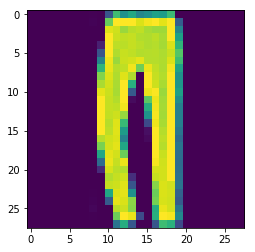

In [102]:
plt.imshow(X_temp)

In [103]:
y_pred[2]

1

In [114]:
i_i = np.nonzero(y_pred != y_test_class )

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [111]:
len(i_i)

1

In [112]:
i_i

(array([0]),)